# Car Acceptability Classification




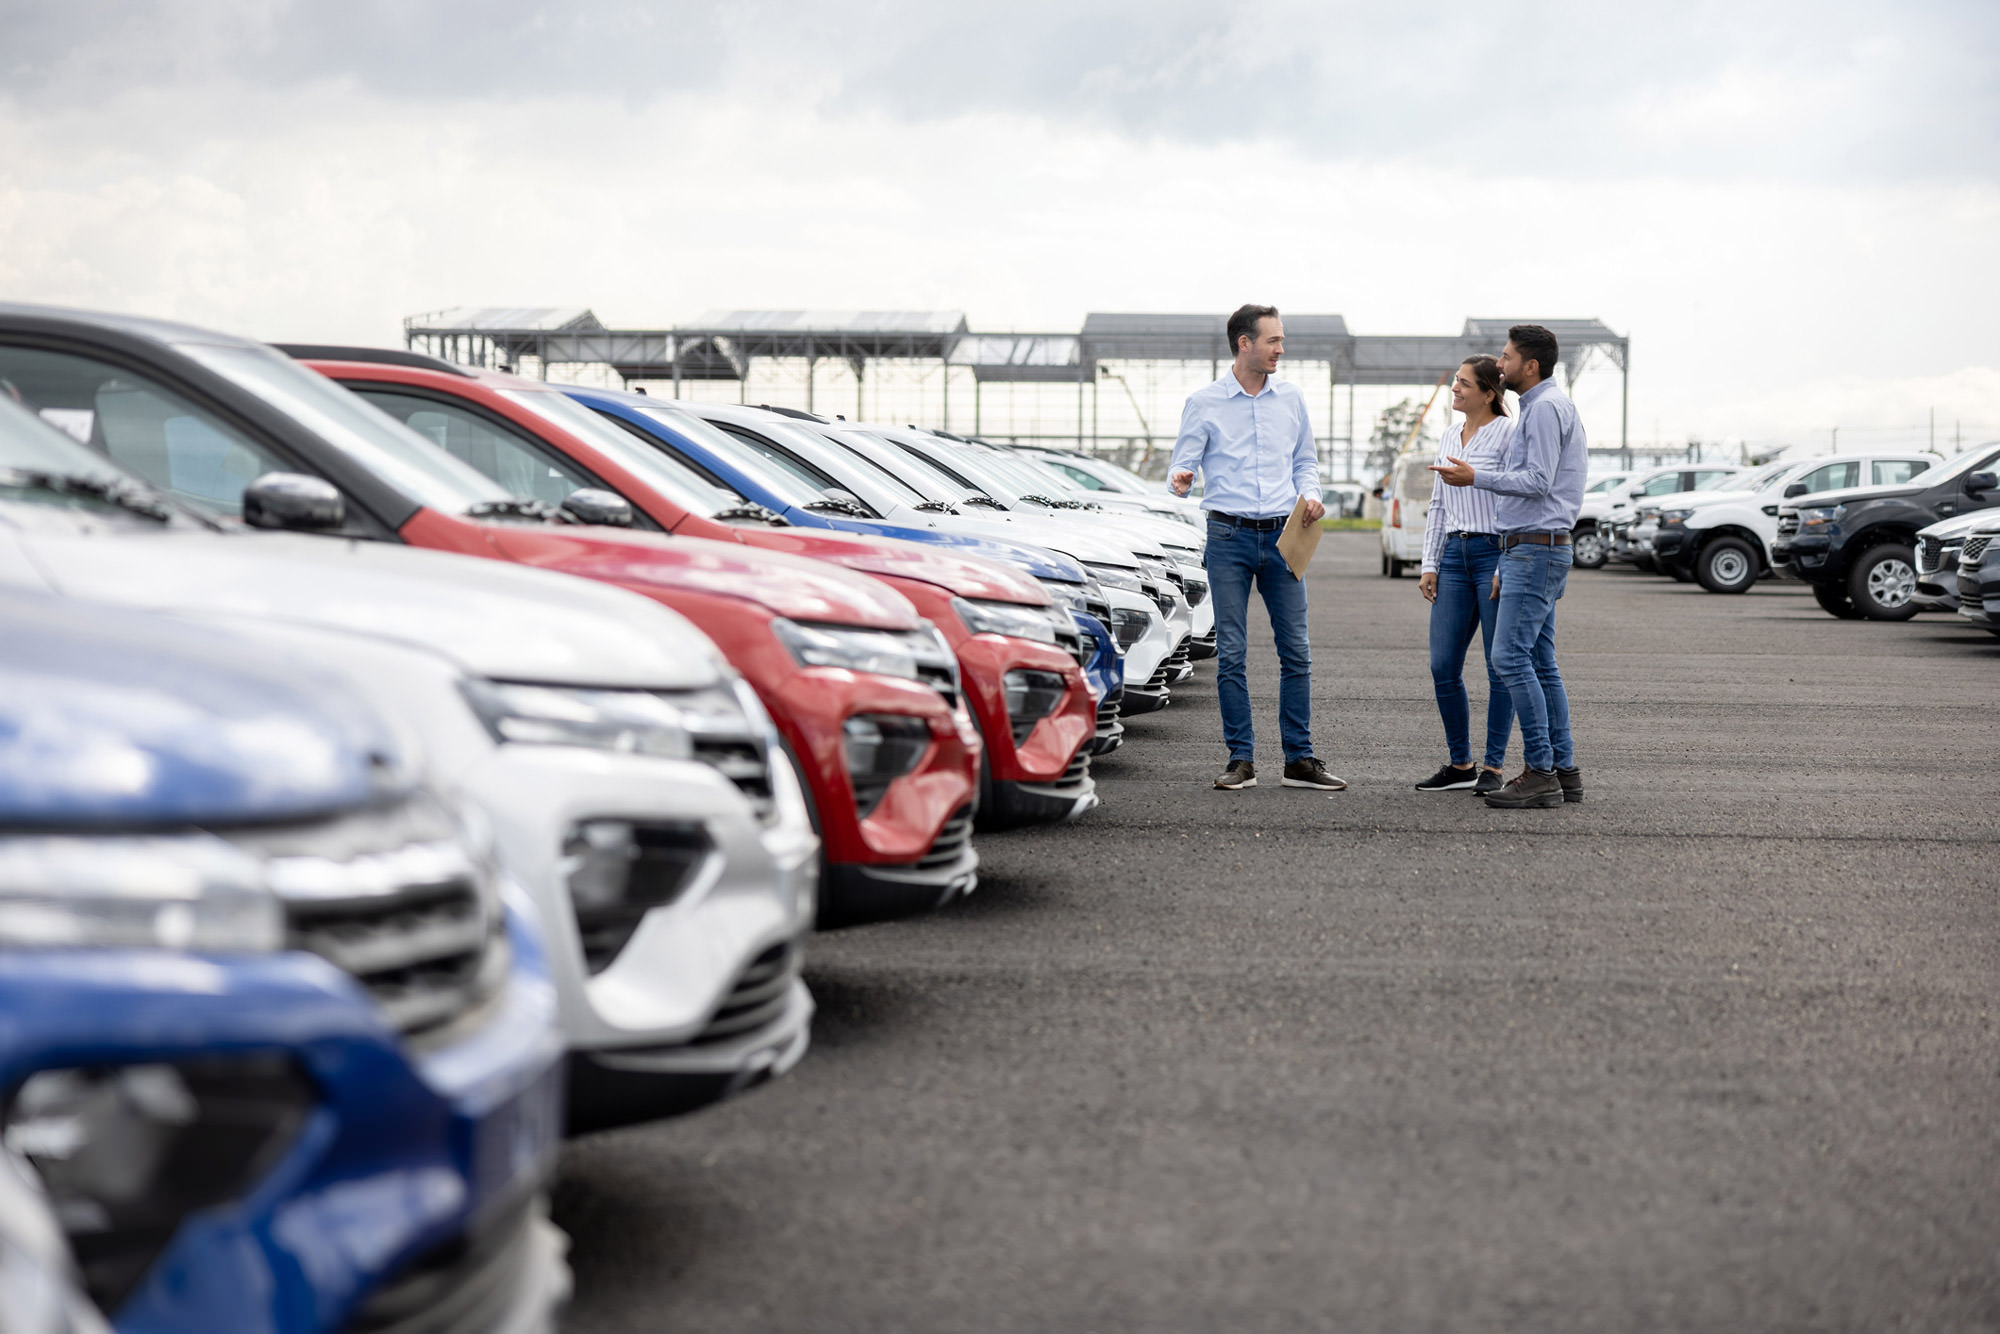

In [ ]:
import numpy as np
import seaborn as sn
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()

Saving car.csv to car.csv


In [ ]:
df = pd.read_csv(open('car.csv'))
df

Buying_Price Maintenance_Price No_of_Doors Person_Capacity  \
0           vhigh             vhigh           2               2   
1           vhigh             vhigh           2               2   
2           vhigh             vhigh           2               2   
3           vhigh             vhigh           2               2   
4           vhigh             vhigh           2               2   
...           ...               ...         ...             ...   
1723          low               low       5more            more   
1724          low               low       5more            more   
1725          low               low       5more            more   
1726          low               low       5more            more   
1727          low               low       5more            more   

     Size_of_Luggage Safety Car_Acceptability  
0              small    low             unacc  
1              small    med             unacc  
2              small   high             unacc  
3                med    low             unacc  
4                med    med             unacc  
...              ...    ...               ...  
1723             med    med              good  
1724             med   high             vgood  
1725             big    low             unacc  
1726             big    med              good  
1727             big   high             vgood  

[1728 rows x 7 columns]

## Յուրաքանչյուր փոփոխականի նկարագրությունը հետևյալն է.

**Buying_Price** - Կատեգորիայի տվյալներ [շատ բարձր, բարձր, միջին, ցածր]

**Maintenance_Price** - Կատեգորիայի տվյալներ [շատ բարձր, բարձր, միջին, ցածր]

**No_of_Doors** - Կատեգորիկ տվյալներ

**Անձի_կարողություն** - Կատեգորիկ տվյալներ [2, 4, ավելին]

**Size_of_Luggage** - Կատեգորիայի տվյալներ [փոքր, միջին, մեծ]

**Անվտանգություն**- Կատեգորիկ տվյալներ

**Car_Acceptability** - Կատեգորիկ տվյալներ

## Վերլուծենք տվյալները

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Buying_Price       1728 non-null   object
 1   Maintenance_Price  1728 non-null   object
 2   No_of_Doors        1728 non-null   object
 3   Person_Capacity    1728 non-null   object
 4   Size_of_Luggage    1728 non-null   object
 5   Safety             1728 non-null   object
 6   Car_Acceptability  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
df.shape

(1728, 7)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Car_Acceptability'].value_counts()

Car_Acceptability
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [ ]:
df['No_of_Doors'] = df['No_of_Doors'].replace({'5 more': '5more'})

In [ ]:
for column in df.columns:
    print(f"Unique values in {column}: {df[column].unique()}")

Unique values in Buying_Price: ['vhigh' 'high' 'med' 'low']
Unique values in Maintenance_Price: ['vhigh' 'high' 'med' 'low']
Unique values in No_of_Doors: ['2' '3' '4' '5more']
Unique values in Person_Capacity: ['2' '4' 'more']
Unique values in Size_of_Luggage: ['small' 'med' 'big']
Unique values in Safety: ['low' 'med' 'high']
Unique values in Car_Acceptability: ['unacc' 'acc' 'vgood' 'good']


In [ ]:
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
from sklearn. tree import DecisionTreeClassifier

In [ ]:
ie_buying = LabelEncoder()
ie_maintance =LabelEncoder()
ie_person =  LabelEncoder()
ie_safety = LabelEncoder()
ie_accept = LabelEncoder()

In [ ]:
df['buying_numeric']=ie_buying.fit_transform(df['Buying_Price'])
df['maintenance_numeric']= ie_maintance.fit_transform(df['Maintenance_Price'])
df['person_numeric']=ie_person. fit_transform(df['Person_Capacity'])
df['safety_numeric'] = ie_safety.fit_transform(df['Safety'])
df['acceptance_numeric']= ie_accept.fit_transform(df['Car_Acceptability'])

In [ ]:
df.head()

Buying_Price Maintenance_Price No_of_Doors Person_Capacity Size_of_Luggage  \
0        vhigh             vhigh           2               2           small   
1        vhigh             vhigh           2               2           small   
2        vhigh             vhigh           2               2           small   
3        vhigh             vhigh           2               2             med   
4        vhigh             vhigh           2               2             med   

  Safety Car_Acceptability  buying_numeric  maintenance_numeric  \
0    low             unacc               3                    3   
1    med             unacc               3                    3   
2   high             unacc               3                    3   
3    low             unacc               3                    3   
4    med             unacc               3                    3   

   person_numeric  safety_numeric  acceptance_numeric  
0               0               1                   2  
1               0               2                   2  
2               0               0                   2  
3               0               1                   2  
4               0               2                   2

In [ ]:
print(df.dtypes)

Buying_Price           object
Maintenance_Price      object
No_of_Doors            object
Person_Capacity        object
Size_of_Luggage        object
Safety                 object
Car_Acceptability      object
buying_numeric          int64
maintenance_numeric     int64
person_numeric          int64
safety_numeric          int64
acceptance_numeric      int64
dtype: object


In [ ]:
numeric_data= df.drop(['Buying_Price', 'Maintenance_Price', 'Person_Capacity', 'Car_Acceptability', 'Safety'], axis=1)


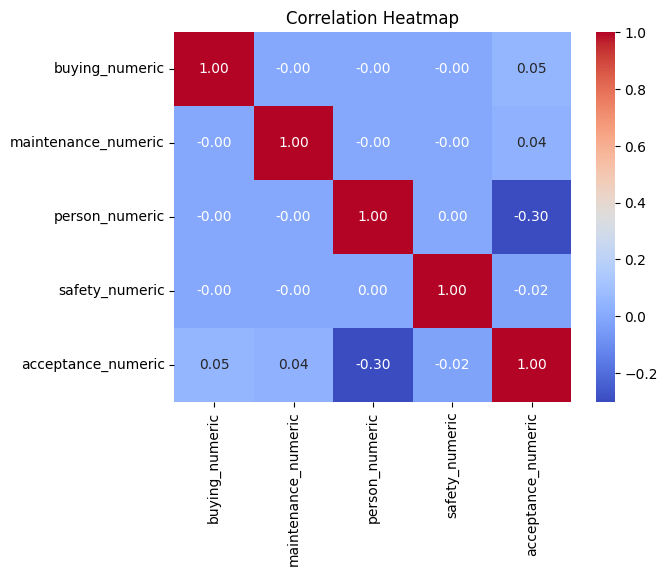

In [ ]:
numeric_data = df.select_dtypes(include=['int64', 'float64'])

corr = numeric_data.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Sample data (a small portion of the data you provided)
data = {
    'Buying_Price': ['vhigh', 'vhigh', 'vhigh', 'vhigh', 'vhigh', 'low', 'low', 'low', 'low', 'low'],
    'Maintenance_Price': ['vhigh', 'vhigh', 'vhigh', 'vhigh', 'vhigh', 'low', 'low', 'low', 'low', 'low'],
    'No_of_Doors': [2, 2, 2, 2, 2, '5more', '5more', '5more', '5more', '5more'],
    'Person_Capacity': [2, 2, 2, 2, 2, 'more', 'more', 'more', 'more', 'more'],
    'Size_of_Luggage': ['small', 'small', 'small', 'med', 'med', 'med', 'med', 'big', 'big', 'big'],
    'Safety': ['low', 'med', 'high', 'low', 'med', 'med', 'high', 'low', 'med', 'high'],
    'Car_Acceptability': ['unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'unacc', 'good', 'vgood']
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Initialize LabelEncoder for encoding categorical data
encoder = LabelEncoder()

# Convert all categorical columns to string type to ensure uniformity
df['Buying_Price'] = df['Buying_Price'].astype(str)
df['Maintenance_Price'] = df['Maintenance_Price'].astype(str)
df['Size_of_Luggage'] = df['Size_of_Luggage'].astype(str)
df['Safety'] = df['Safety'].astype(str)
df['Car_Acceptability'] = df['Car_Acceptability'].astype(str)
df['No_of_Doors'] = df['No_of_Doors'].astype(str)
df['Person_Capacity'] = df['Person_Capacity'].astype(str)

# Encode categorical columns
df['Buying_Price'] = encoder.fit_transform(df['Buying_Price'])
df['Maintenance_Price'] = encoder.fit_transform(df['Maintenance_Price'])
df['Size_of_Luggage'] = encoder.fit_transform(df['Size_of_Luggage'])
df['Safety'] = encoder.fit_transform(df['Safety'])
df['Car_Acceptability'] = encoder.fit_transform(df['Car_Acceptability'])
df['No_of_Doors'] = encoder.fit_transform(df['No_of_Doors'])
df['Person_Capacity'] = encoder.fit_transform(df['Person_Capacity'])

# Features (X) and target variable (y)
x = df.drop(columns='Car_Acceptability')
y = df['Car_Acceptability']

# Split the data into training, validation, and test sets
x_t, x_te, y_t, y_te = train_test_split(x, y, test_size=0.25, random_state=20)
x_train, x_val, y_train, y_val = train_test_split(x_t, y_t, test_size=0.2, random_state=20)

# Print the shapes of the sets
print("Training set:", x_train.shape, y_train.shape)
print("Validation set:", x_val.shape, y_val.shape)
print("Test set:", x_te.shape, y_te.shape)


Training set: (5, 6) (5,)
Validation set: (2, 6) (2,)
Test set: (3, 6) (3,)


## Decision Tree Model

In [ ]:
input_data= numeric_data.drop(['acceptance_numeric'], axis=1)
target_data =numeric_data.drop(['buying_numeric', 'maintenance_numeric', 'person_numeric', 'safety_numeric'], axis=1)

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model = tree.DecisionTreeClassifier(criterion='gini', min_samples_split =3,max_depth=15)
model.fit(input_data, target_data)
model.score(input_data, target_data)

0.8923611111111112

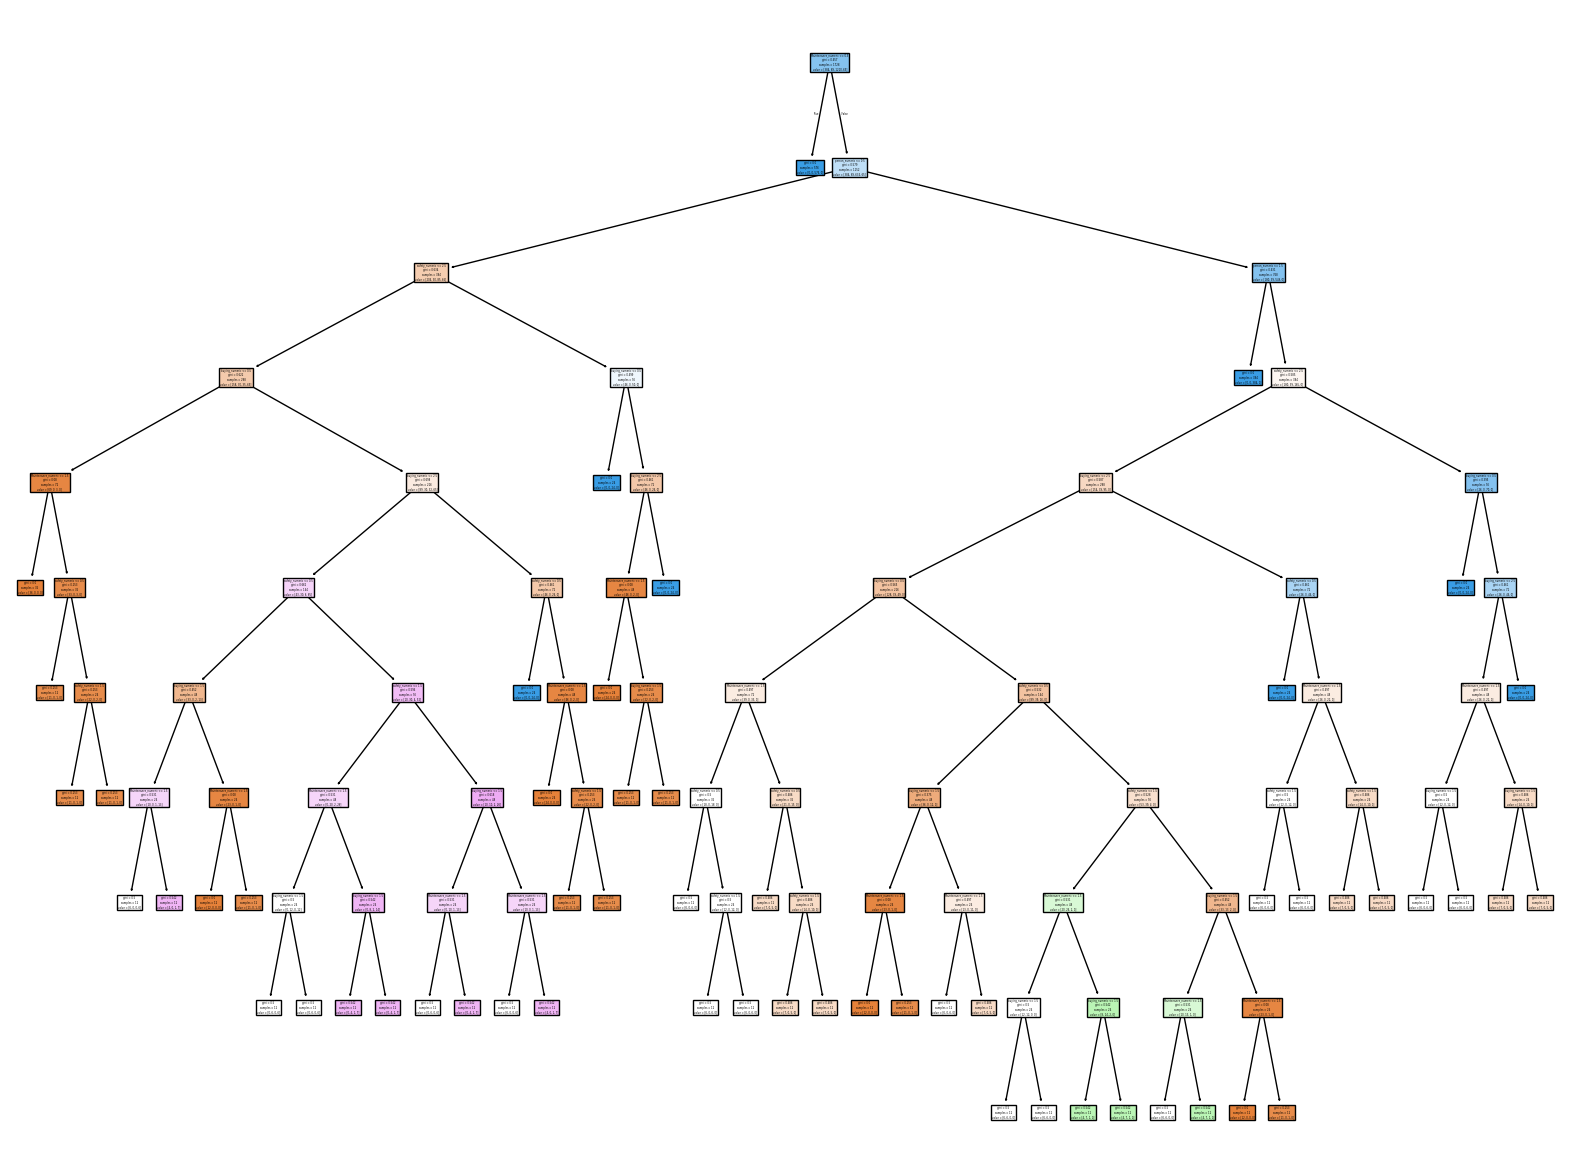

In [ ]:
fig = plt.figure(figsize=(20, 15))

# Plot decision tree
decision_tree = tree.plot_tree(model, feature_names=['buying_numeric', 'safety_numeric', 'Maintenance_numeric', 'person_numeric', 'safety_numeric'], filled=True)

plt.show()

In [ ]:
# 1. Գրադարանների ներմուծում
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error

# 2. Տվյալների բաժանում ուսուցման և ստուգման խմբերի
# 80% ուսուցման տվյալներ, 20% ստուգման տվյալներ
X_train, X_test, y_train, y_test = train_test_split(input_data, target_data, test_size=0.2, random_state=42)

# 3. KNN մոդելի ստեղծում (n_neighbors=3 նշանակում է, որ ամեն մոտակա 3 neighbors-ը կկատարվեն)
knn_model = KNeighborsClassifier(n_neighbors=3)

# 4. Մոդելի ուսուցում
knn_model.fit(X_train, y_train)

# 5. Մոդելի գնահատում
y_pred = knn_model.predict(X_test)

# Ճշգրտության հաշվել
accuracy = accuracy_score(y_test, y_pred)

# Ճշգրտության ցուցադրման համար
print(f'KNN մոդելի ճշգրտությունը (accuracy): {accuracy * 100:.2f}%')

KNN մոդելի ճշգրտությունը (accuracy): 85.26%


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
# 1. Գրադարանների ներմուծում
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 2. Տվյալների բաժանում ուսուցման և ստուգման խմբերի
X_train, X_test, y_train, y_test = train_test_split(input_data, target_data, test_size=0.2, random_state=42)

# 3. Logistic Regression մոդելի ստեղծում
log_reg_model = LogisticRegression(max_iter=1000)

# 4. Մոդելի ուսուցում
log_reg_model.fit(X_train, y_train)

# 5. Մոդելի գնահատում
y_pred = log_reg_model.predict(X_test)

# Ճշգրտության հաշվել
accuracy = accuracy_score(y_test, y_pred)

# Ճշգրտության ցուցադրման համար
print(f'Logistic Regression մոդելի ճշգրտությունը (accuracy): {accuracy * 100:.2f}%')

Logistic Regression մոդելի ճշգրտությունը (accuracy): 65.32%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Assuming input_data and target_data are your original features and target variable
from sklearn.model_selection import train_test_split

# Perform the train-test split correctly
x_train, x_test, y_train, y_test = train_test_split(input_data, target_data, test_size=0.2, random_state=42)

# Rest of your code using x_train and y_train
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# Assuming dt_model is your DecisionTreeClassifier
dt_model = tree.DecisionTreeClassifier()

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)

# Use the correctly assigned x_train and y_train
grid_search.fit(x_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'max_depth': 7, 'min_samples_split': 2}


In [ ]:
y_test_pred_dt = grid_search.predict(x_test)
dt_f1 = f1_score(y_test, y_test_pred_dt, average='weighted')
print(f"Decision Tree F1-Score: {dt_f1}")
y_test_pred_knn = grid_search.predict(x_test)  # KNN մոդելի կանխատեսումներ
knn_f1 = f1_score(y_test, y_test_pred_knn, average='weighted')  # F1 միավորի հաշվարկ
print(f"KNN F1-Score: {knn_f1}")  # Տպել F1 միավորը
y_test_pred_lr = grid_search.predict(x_test)  # Logistic Regression մոդելի կանխատեսումներ
lr_f1 = f1_score(y_test, y_test_pred_lr, average='weighted')  # F1 միավորի հաշվարկ
print(f"Logistic Regression F1-Score: {lr_f1}")  # Տպել F1 միավորը

Decision Tree F1-Score: 0.8674203653006776
KNN F1-Score: 0.8674203653006776
Logistic Regression F1-Score: 0.8674203653006776


In [ ]:
if log_reg_f1 > knn_f1 and log_reg_f1 > dt_f1:
    print("Logistic Regression is the best model!")
elif knn_f1 > log_reg_f1 and knn_f1 > dt_f1:
    print("KNN is the best model!")
else:
    print("Decision Tree is the best model!")

Decision Tree is the best model!


In [ ]:
df_encoded = pd.get_dummies(df)
df_encoded

Buying_Price  Maintenance_Price  No_of_Doors  Person_Capacity  \
0             1                  1            0                0   
1             1                  1            0                0   
2             1                  1            0                0   
3             1                  1            0                0   
4             1                  1            0                0   
5             0                  0            1                1   
6             0                  0            1                1   
7             0                  0            1                1   
8             0                  0            1                1   
9             0                  0            1                1   

   Size_of_Luggage  Safety  Car_Acceptability  
0                2       1                  1  
1                2       2                  1  
2                2       0                  1  
3                1       1                  1  
4                1       2                  1  
5                1       2                  1  
6                1       0                  0  
7                0       1                  1  
8                0       2                  0  
9                0       0                  2